In [11]:
import numpy as np
import pandas as pd
import pickle
import zipfile
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

with zipfile.ZipFile('/content/drive/MyDrive/datas/MID.pkl.zip', 'r') as zip_ref:
  zip_ref.extractall('/content/sample_data')

with open('/content/sample_data/MID.pkl', 'rb') as f:
  mid_df = pickle.load(f)

print("MID Dataset Load Done!")

MID Dataset Load Done!


In [2]:
mid_df['firstblood'] = mid_df['firstblood'].astype('int')
mid_df.loc[:, mid_df.dtypes == bool] = mid_df.select_dtypes('bool').astype('int')

In [3]:
mid_df.drop(columns=['win', 'position', 'championid'], inplace=True)

In [4]:
df_x_col33 = mid_df

print(df_x_col33.shape)
df_x_col33.tail(3)

(335822, 33)


neutralminionskilledteamjungle    deaths  ...  firstinhibitor  firsttower
335819                        0.330229  0.228620  ...               0           0
335820                        0.117474  0.323054  ...               0           0
335821                        0.117474  0.176211  ...               0           0

[3 rows x 33 columns]

In [5]:
del_list = ['deaths', 'largestcriticalstrike', 'visionwardsboughtingame',
            'largestkillingspree', 'champlevel', 'kills', 'assists', 'goldspent', 
            'firstblood', 'killingsprees', 'firstinhibitor', 'firsttower', 'gameduration']

mid_df.drop(columns=del_list, inplace=True)

In [7]:
df_x_col20 = mid_df

print(df_x_col20.shape)
df_x_col20.tail(3)

(335822, 20)


neutralminionskilledteamjungle  ...  longesttimespentliving
335819                        0.330229  ...               11.405588
335820                        0.117474  ...               12.217327
335821                        0.117474  ...               24.405286

[3 rows x 20 columns]

In [ ]:
mm_x_33 = MinMaxScaler().fit_transform(df_x_col33)
mm_x_20 = MinMaxScaler().fit_transform(df_x_col20)

## T-SNE를 통한 df_x 데이터셋 차원축소

#### mm_x(cols=33) -> PCA(33->16) -> TSNE(n_components=2, perplexity=50)

In [ ]:
pca = PCA(n_components=16)
result = pca.fit_transform(mm_x_33)

model = TSNE(n_components=2, verbose=1, n_jobs=-1, perplexity=50)
tsne_data = model.fit_transform(result)

with open('/content/drive/MyDrive/datas/total_pca_tsne.pkl', 'wb') as f:
  pickle.dump(tsne_data, f)

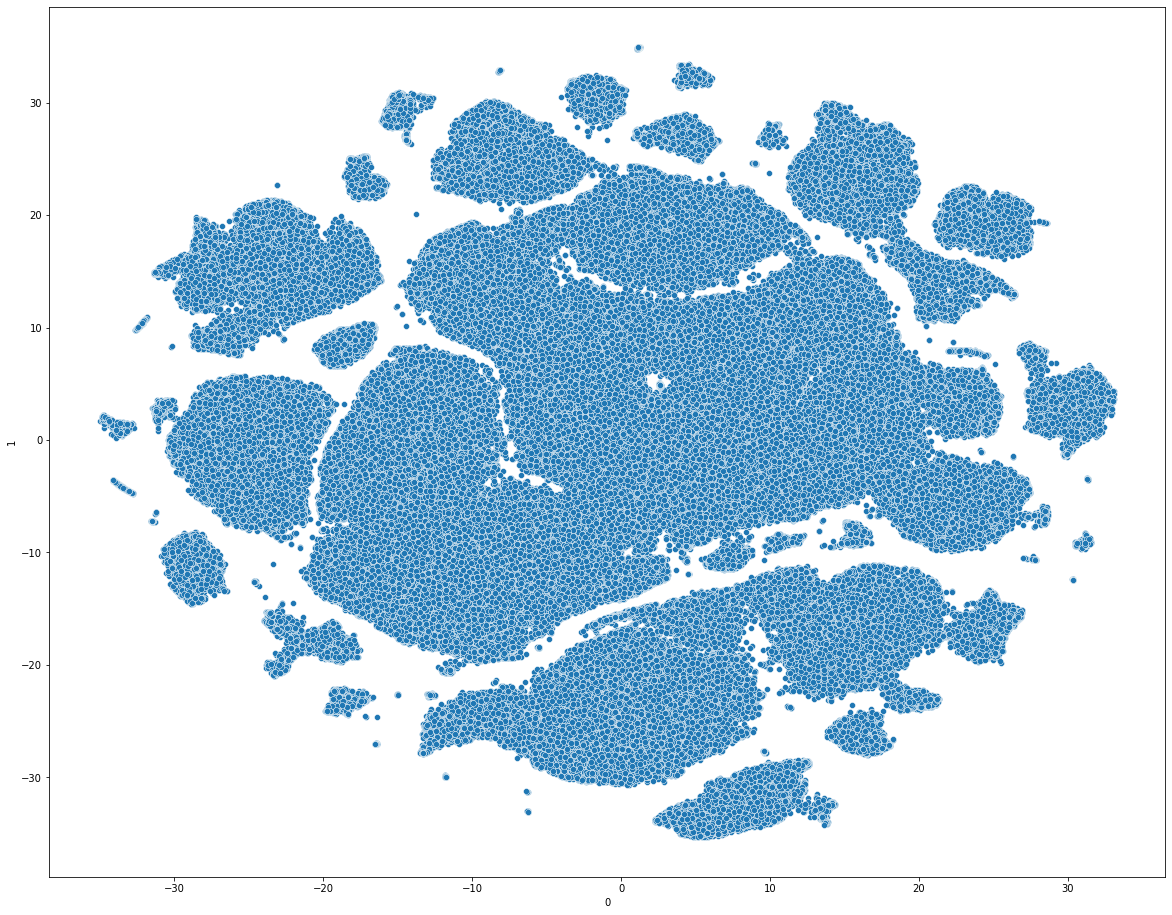

In [ ]:
tsne_df = pd.DataFrame(tsne_data)

plt.figure(figsize=(20, 16))

sns.scatterplot(data=tsne_df, x=0, y=1);

#### df_x_col33 -> TSNE(n_components=2, perplexity=50)
- KMeans(n_clusters=8) 결과 Visualization

In [ ]:
model_2 = TSNE(n_components=2, verbose=1, n_jobs=-1, perplexity=50)
tsne_datas = model_2.fit_transform(df_x_col33)

with open('/content/drive/MyDrive/datas/final_total_tsne.pkl', 'wb') as f:
  pickle.dump(tsne_datas, f)

In [ ]:
model = KMeans(n_clusters=8)
model.fit(mm_x_33)

tsne_df = pd.DataFrame(tsne_datas)
tsne_df['label'] = model.labels_

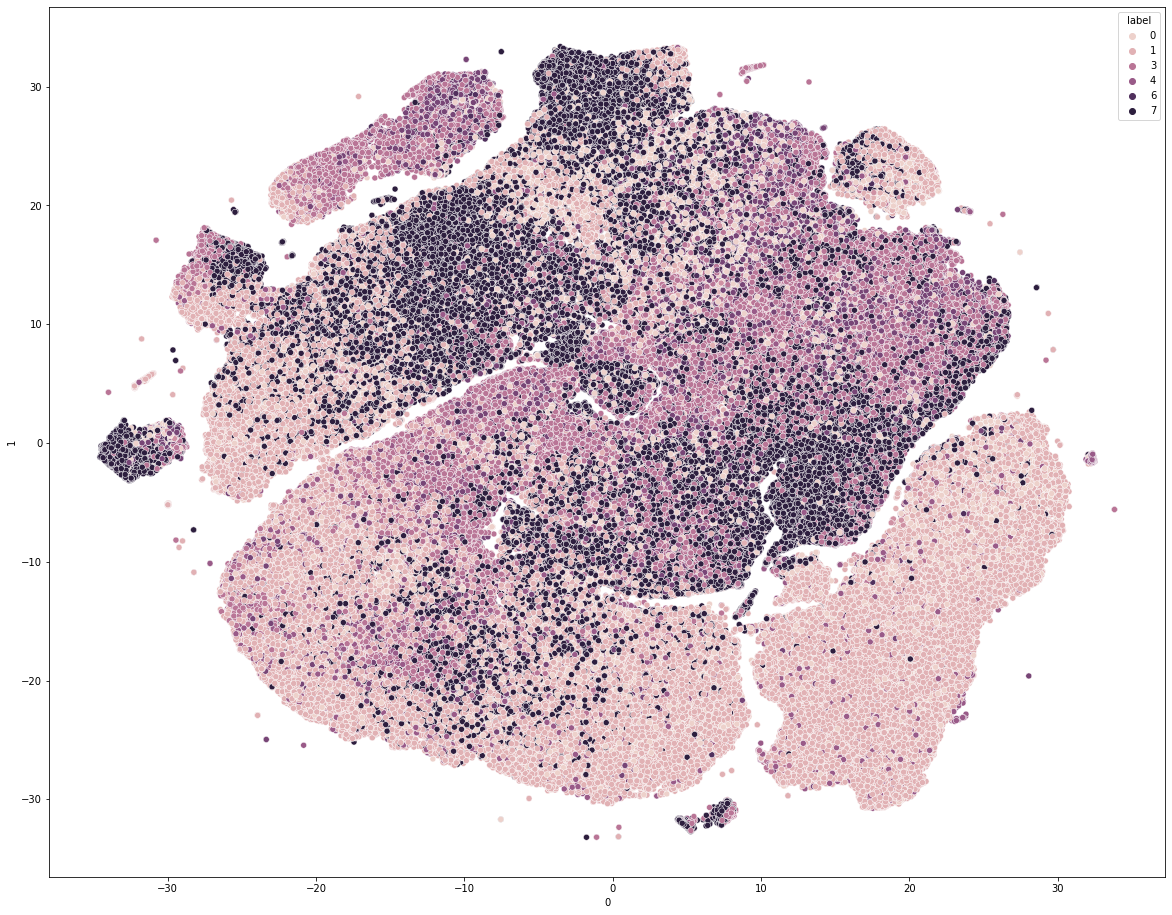

In [ ]:
plt.figure(figsize=(20, 16))

sns.scatterplot(data=tsne_df, x=0, y=1, hue='label');

#### df_x_col20 -> TSNE(n_components=2, perplexity=15)

In [ ]:
tsne_model = TSNE(n_components=2, verbose=1, n_jobs=-1, perplexity=15)
tsne_datas = tsne_model.fit_transform(df_x_col20)

with open('/content/drive/MyDrive/datas/final_tsne_2.pkl', 'wb') as f:
  pickle.dump(tsne_datas, f)

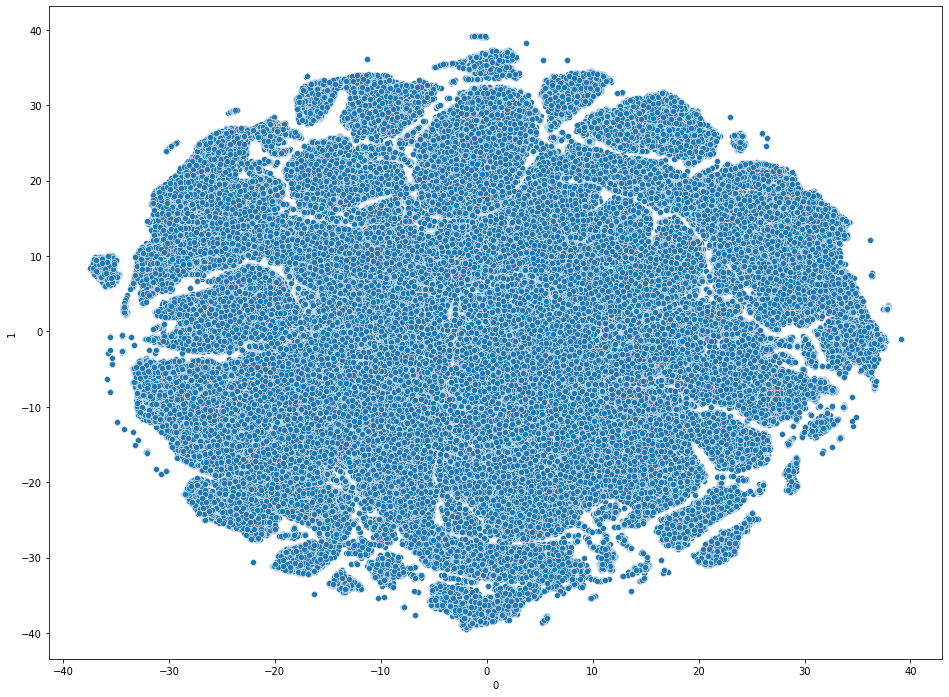

In [ ]:
test = pd.DataFrame(tsne_datas)

plt.figure(figsize=(16, 12))

sns.scatterplot(data=test, x=0, y=1)

#### mm_x(cols=20) -> PCA(20->10) -> TSNE(n_components=2, perplexity=50)

In [ ]:
pca_1 = PCA(n_components=10)
result_1 = pca_1.fit_transform(mm_x_20)

In [ ]:
model_1 = TSNE(n_components=2, verbose=1, n_jobs=-1, perplexity=50)
tsne_data_1 = model_1.fit_transform(result_1)
tsne_data_1

In [8]:
with open('/content/drive/MyDrive/datas/pca_tsne.pkl', 'rb') as f:
  tsne_data_1 = pickle.load(f)

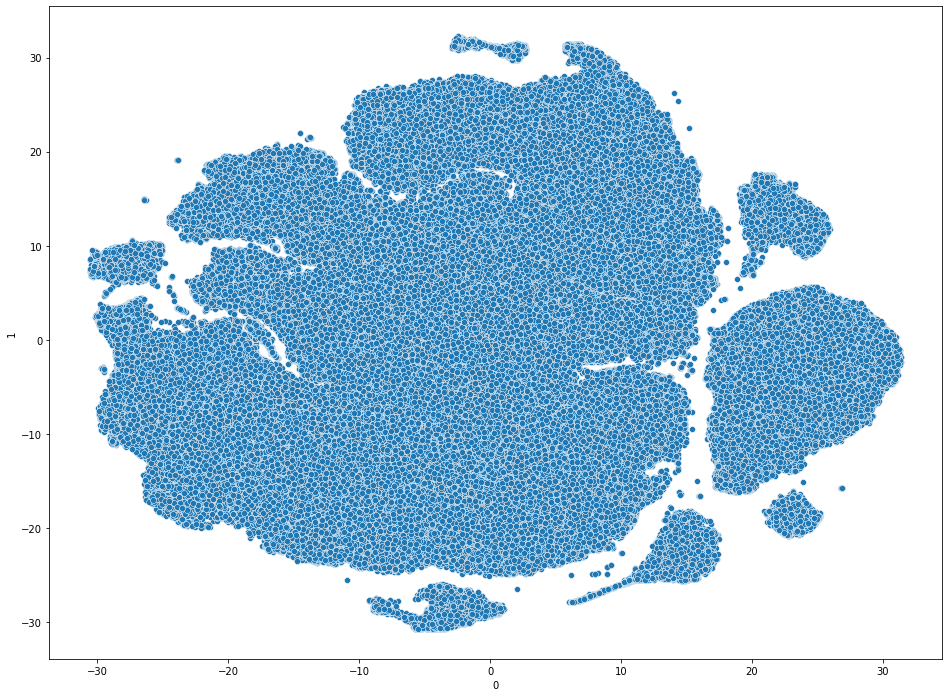

In [12]:
test = pd.DataFrame(tsne_data_1)

plt.figure(figsize=(16, 12))

sns.scatterplot(data=test, x=0, y=1)

#### 추가적으로 컬럼을 더 삭제
```
neutralminionskilledteamjungle, neutralminionskilledenemyjungle, 
wardskilled, wardsplaced, goldearned
```
- MinMax Scaler -> PCA(15->9) -> TSNE(n_components-2, perplexity=50)

In [ ]:
mid_df.drop(columns=['neutralminionskilledteamjungle', 'neutralminionskilledenemyjungle',
                     'wardskilled', 'wardsplaced', 'goldearned'], inplace=True)

In [ ]:
df_x = mid_df.select_dtypes('float')

mm_x = MinMaxScaler().fit_transform(df_x)

In [ ]:
pca_2 = PCA(n_components=9)
result_2 = pca_2.fit_transform(mm_x)

model_2 = TSNE(n_components=2, verbose=1, n_jobs=-1, perplexity=50)
tsne_data_2 = model_2.fit_transform(result_2)

with open('/content/drive/MyDrive/datas/pca9_tsne.pkl', 'wb') as f:
  pickle.dump(tsne_data_2, f)

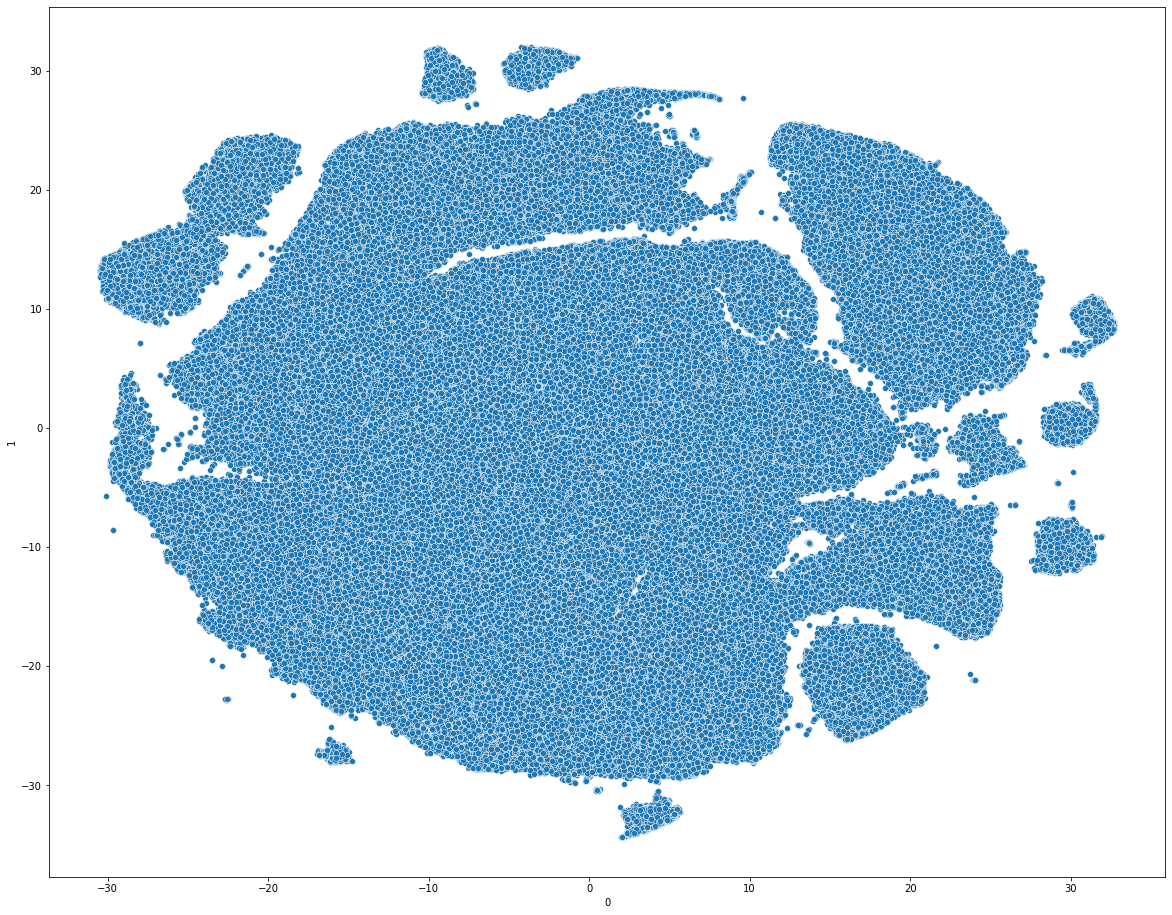

In [ ]:
tsne_df_2 = pd.DataFrame(tsne_data_2)

plt.figure(figsize=(20, 16))

sns.scatterplot(data=tsne_df_2, x=0, y=1);

#### 그 외에 다른 TSNE datas Visualization

In [ ]:
with open('/content/drive/MyDrive/datas/tsne_data_2.pkl', 'rb') as f:
  tsne_datas = pickle.load(f)

test = pd.DataFrame(tsne_datas)

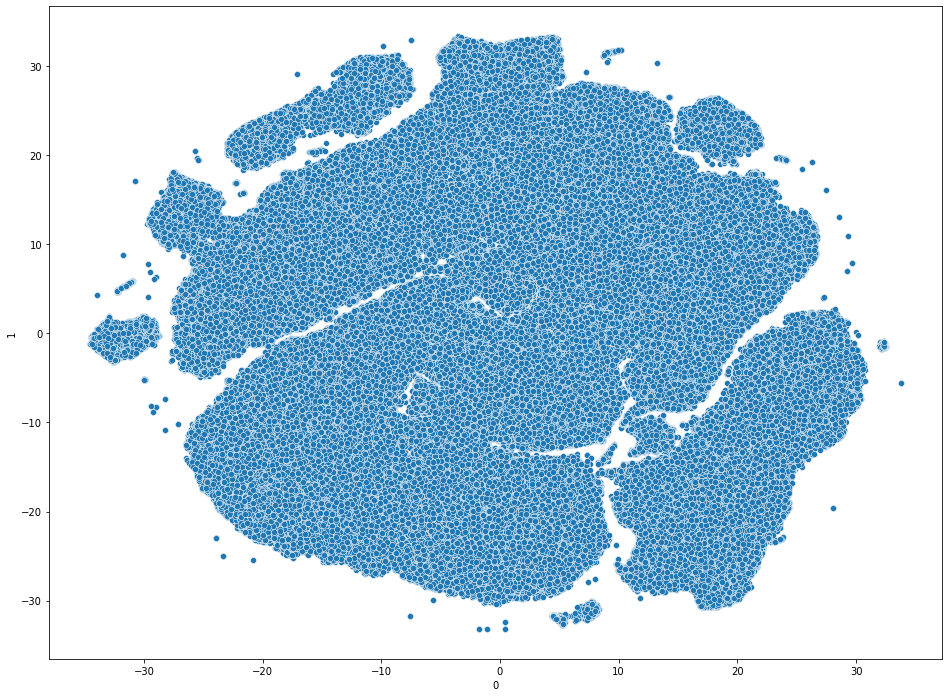

In [ ]:
plt.figure(figsize=(16, 12))

sns.scatterplot(data=test, x=0, y=1)

In [ ]:
with open('/content/drive/MyDrive/datas/tsne_data_lowvar.pkl', 'rb') as f:
  tsne_datas = pickle.load(f)

test2 = pd.DataFrame(tsne_datas)

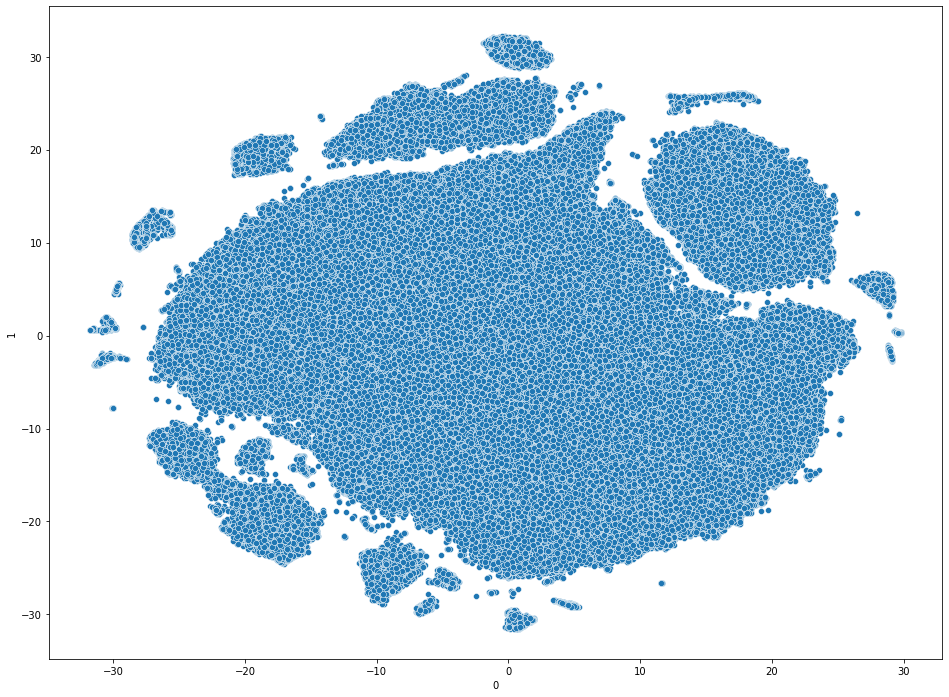

In [ ]:
plt.figure(figsize=(16, 12))

sns.scatterplot(data=test2, x=0, y=1);